In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

C:\Users\HP\AppData\Local\Temp\ipykernel_19712\2892764056.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv("solarpowergeneration.csv")

In [3]:
df

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
0,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069
...,...,...,...,...,...,...,...,...,...,...
2915,0.166453,63,27,13.9,4,10.0,75,10.0,29.93,6995
2916,0.064020,63,27,13.9,1,10.0,66,15.0,29.91,29490
2917,0.294494,63,27,13.9,2,10.0,68,21.0,29.88,17257
2918,0.524968,63,27,13.9,2,10.0,81,17.0,29.87,677


In [4]:
df.describe()

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
count,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2919.000000,2920.000000,2920.000000
mean,0.503294,58.468493,24.953425,10.096986,1.987671,9.557705,73.513699,10.129154,30.017760,6979.846233
std,0.298024,6.841200,6.915178,4.838185,1.411978,1.383884,15.077139,7.261547,0.142006,10312.336413
min,0.050401,42.000000,1.000000,1.100000,0.000000,0.000000,14.000000,0.000000,29.480000,0.000000
25%,0.243714,53.000000,25.000000,6.600000,1.000000,10.000000,65.000000,5.000000,29.920000,0.000000
50%,0.478957,59.000000,27.000000,10.000000,2.000000,10.000000,77.000000,9.000000,30.000000,404.000000
75%,0.739528,63.000000,29.000000,13.100000,3.000000,10.000000,84.000000,15.000000,30.110000,12723.500000
max,1.141361,78.000000,36.000000,26.600000,4.000000,10.000000,100.000000,40.000000,30.530000,36580.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   distance-to-solar-noon       2920 non-null   float64
 1   temperature                  2920 non-null   int64  
 2   wind-direction               2920 non-null   int64  
 3   wind-speed                   2920 non-null   float64
 4   sky-cover                    2920 non-null   int64  
 5   visibility                   2920 non-null   float64
 6   humidity                     2920 non-null   int64  
 7   average-wind-speed-(period)  2919 non-null   float64
 8   average-pressure-(period)    2920 non-null   float64
 9   power-generated              2920 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 228.3 KB


In [6]:
df[df.duplicated()]

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated


In [7]:
# checking the missing values
df.isna().sum()

distance-to-solar-noon         0
temperature                    0
wind-direction                 0
wind-speed                     0
sky-cover                      0
visibility                     0
humidity                       0
average-wind-speed-(period)    1
average-pressure-(period)      0
power-generated                0
dtype: int64

In [8]:
df['average-wind-speed-(period)'] = df['average-wind-speed-(period)'].fillna(df['average-wind-speed-(period)'].median())

In [9]:
df.isna().sum()

distance-to-solar-noon         0
temperature                    0
wind-direction                 0
wind-speed                     0
sky-cover                      0
visibility                     0
humidity                       0
average-wind-speed-(period)    0
average-pressure-(period)      0
power-generated                0
dtype: int64

In [10]:
df.nunique()

distance-to-solar-noon         2660
temperature                      37
wind-direction                   35
wind-speed                      159
sky-cover                         5
visibility                       17
humidity                         75
average-wind-speed-(period)      32
average-pressure-(period)        90
power-generated                1529
dtype: int64

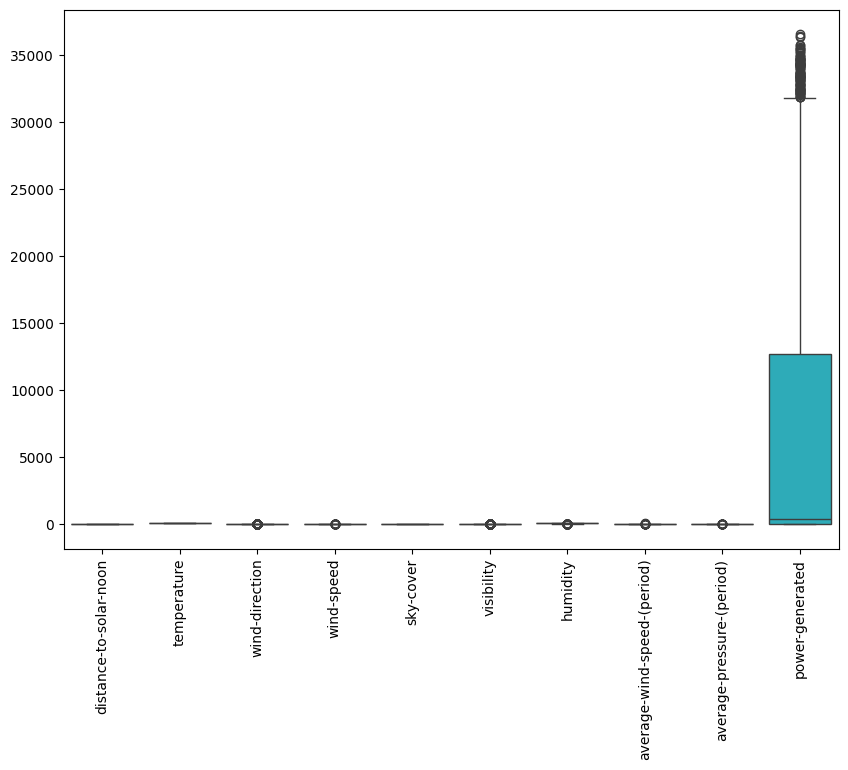

In [11]:
# for checking any outlier is present or not if yes then we can use medain if no then we can use mean
plt.figure(figsize=(10,7))
sns.boxplot(df)
plt.xticks(rotation=90)
plt.show()

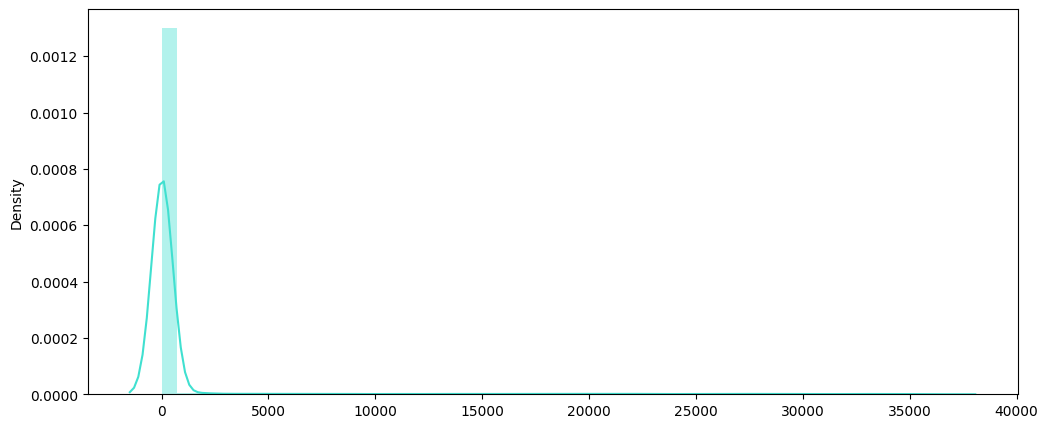

<Axes: >

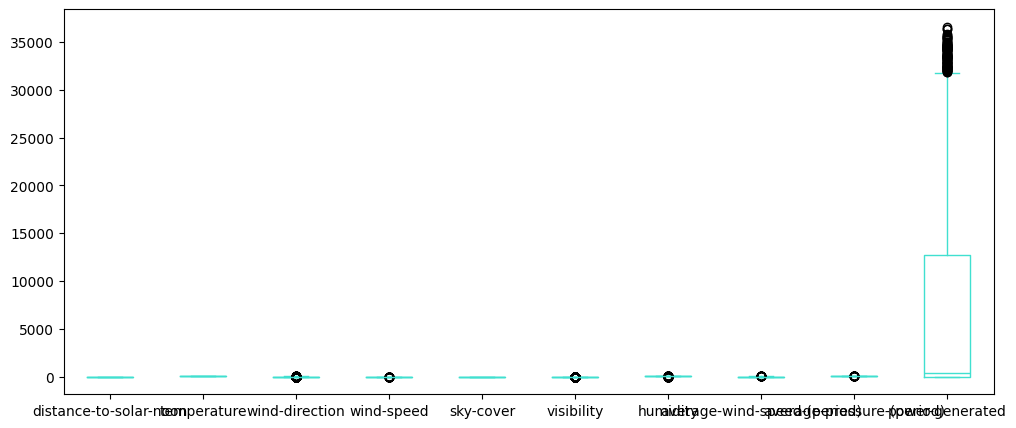

In [12]:
# checking the outlier
plt.figure(figsize=(12,5))
sns.distplot(df,color = 'turquoise')
plt.show()
df.plot.box(figsize=(12,5),color = 'turquoise')

In [13]:
# Select only numeric columns for the correlation matrix
numeric_df = df.select_dtypes(include=['float64', 'int64'])

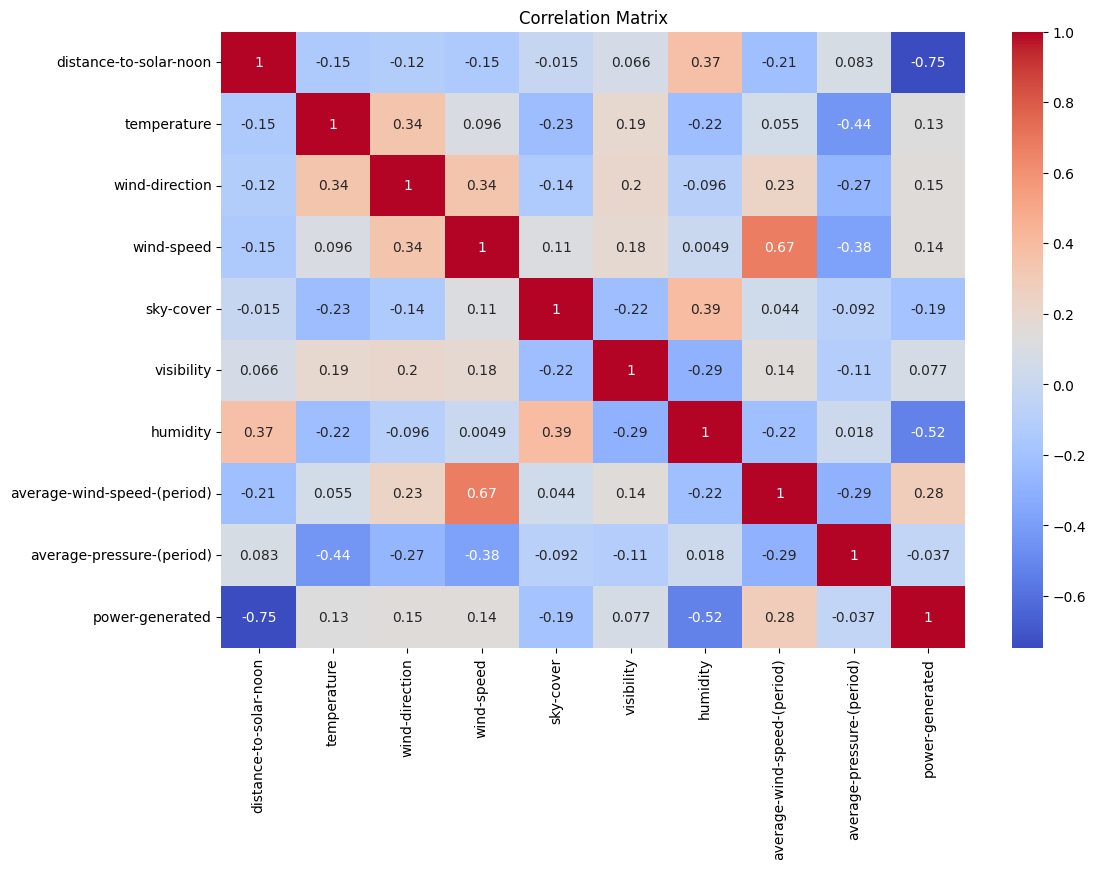

In [14]:
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

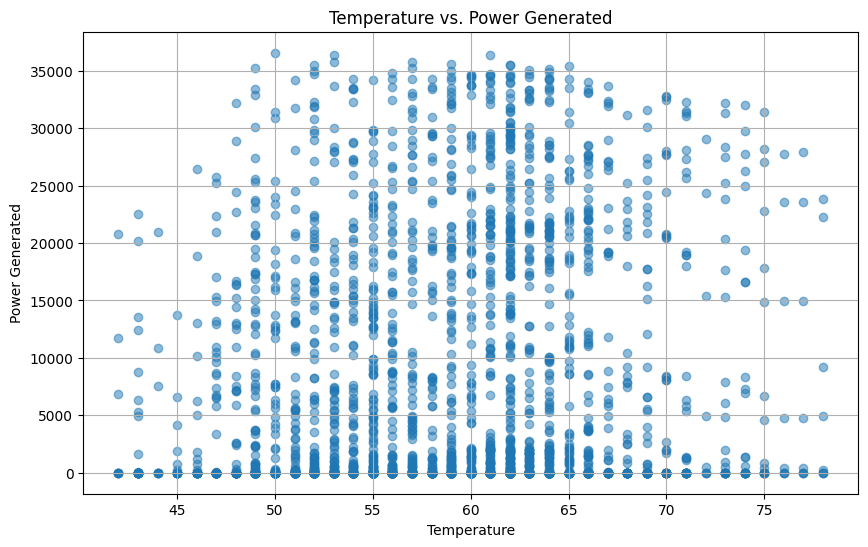

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(df['temperature'], df['power-generated'], alpha=0.5)
plt.title('Temperature vs. Power Generated')
plt.xlabel('Temperature')
plt.ylabel('Power Generated')
plt.grid(True)
plt.show()

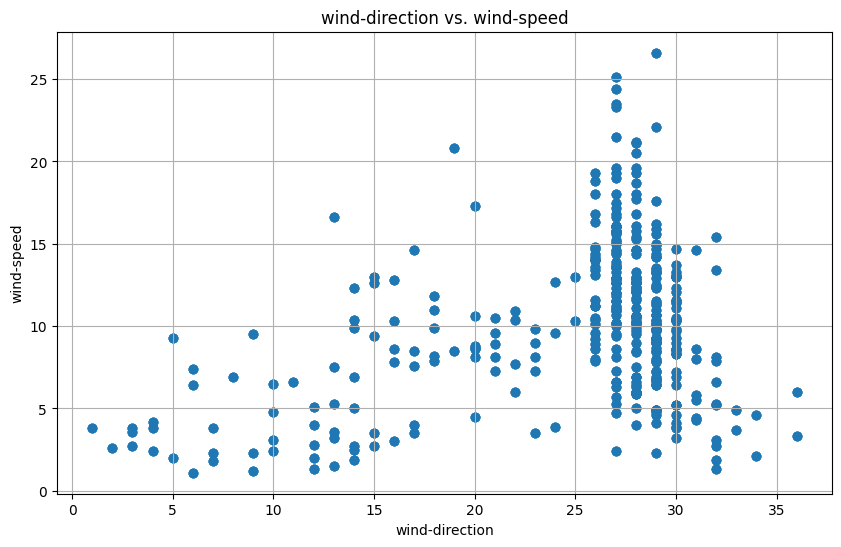

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(df['wind-direction'], df['wind-speed'], alpha=0.5)
plt.title('wind-direction vs. wind-speed')
plt.xlabel('wind-direction')
plt.ylabel('wind-speed')
plt.grid(True)
plt.show()

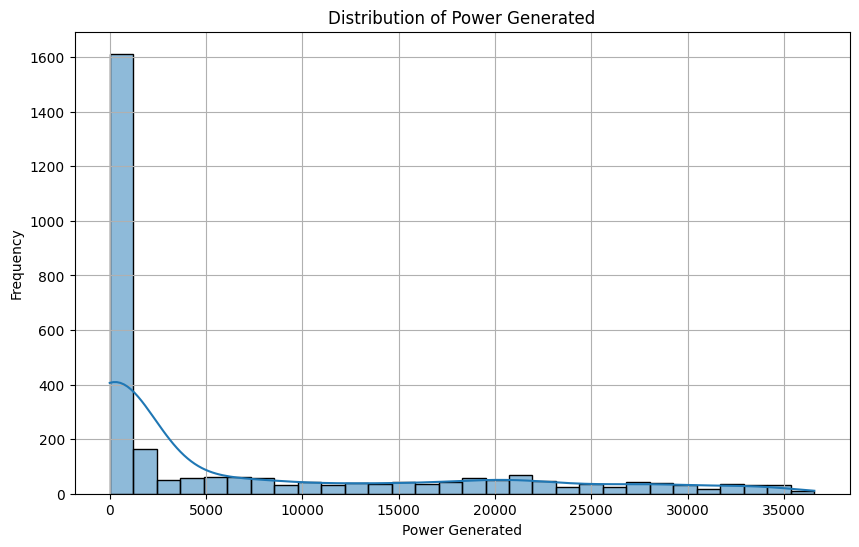

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(df['power-generated'], bins=30, kde=True)
plt.title('Distribution of Power Generated')
plt.xlabel('Power Generated')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

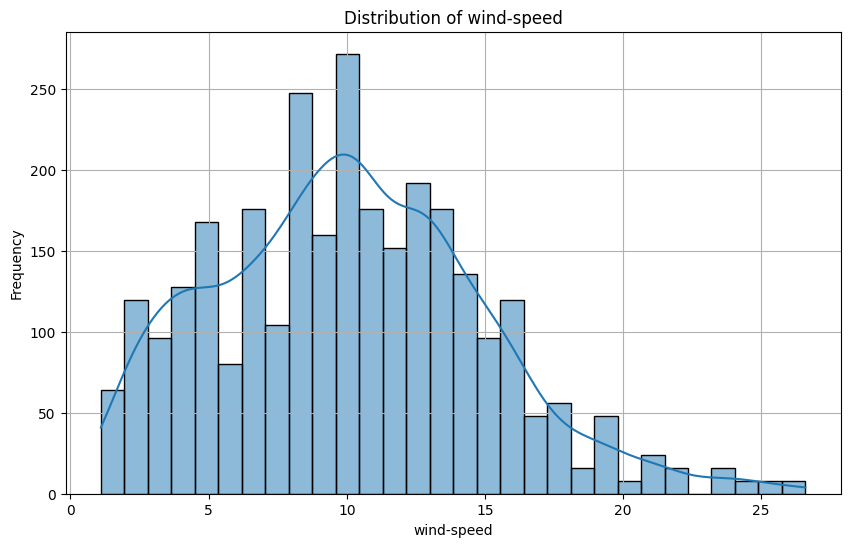

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(df['wind-speed'], bins=30, kde=True)
plt.title('Distribution of wind-speed')
plt.xlabel('wind-speed')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

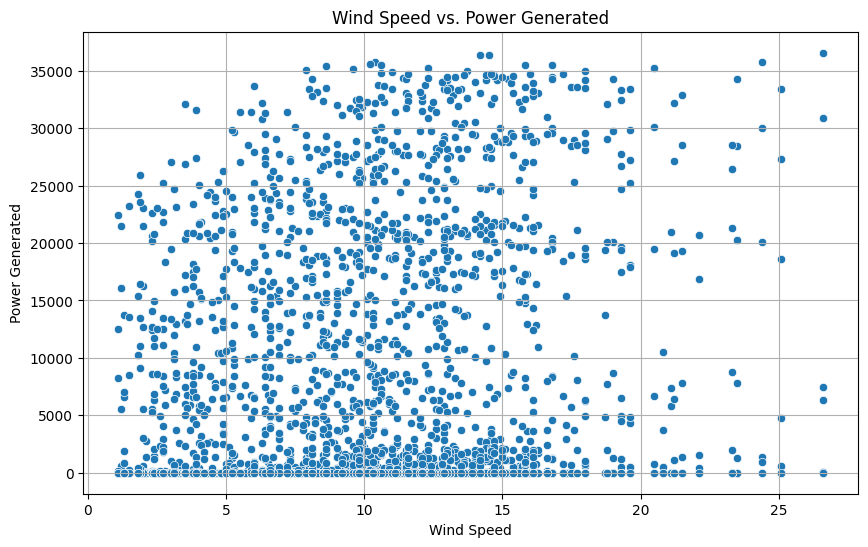

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='wind-speed', y='power-generated', data=df)
plt.title('Wind Speed vs. Power Generated')
plt.xlabel('Wind Speed')
plt.ylabel('Power Generated')
plt.grid(True)
plt.show()

sns.pairplot(df)
plt.show()

In [20]:
for column in df.columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    median_value = df[column].median()
    df[column] = df[column].apply(
        lambda x: median_value if x < lower_bound or x > upper_bound else x
    )

<Axes: >

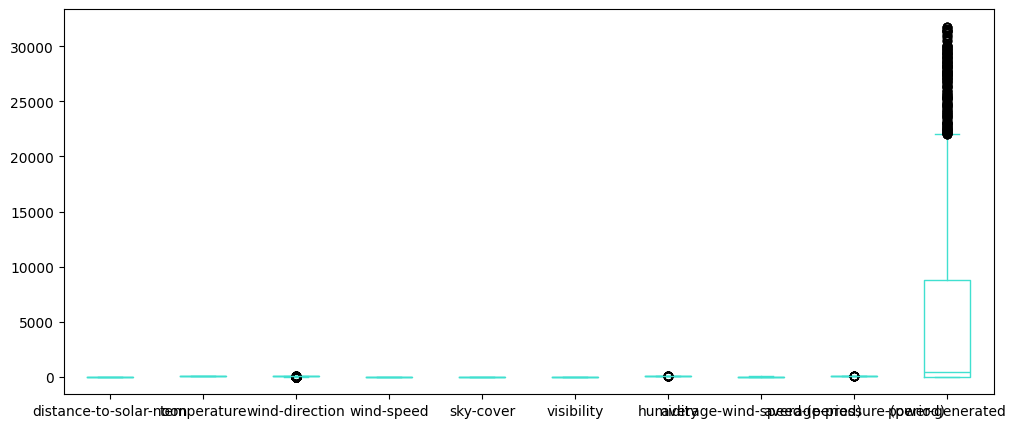

In [21]:
df.plot.box(figsize=(12,5),color = 'turquoise')

In [22]:
df = df.rename(columns={'distance-to-solar-noon': 'Distance', 'wind-direction': 'wind_direction', 'wind-speed': 'wind_speed', 'sky-cover': 'sky_cover', 'average-wind-speed-(period)': 'average_wind_speed', 'average-pressure-(period)': 'average_pressure'})

In [23]:
df.describe()

,Distance,temperature,wind_direction,wind_speed,sky_cover,visibility,humidity,average_wind_speed,average_pressure,power-generated
count,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.0,2920.000000,2920.000000,2920.000000,2920.000000
mean,0.503294,58.468493,27.613699,9.897260,1.987671,10.0,74.884589,9.924658,30.014579,5758.897603
std,0.298024,6.841200,2.307342,4.524841,1.411978,0.0,12.959765,6.942859,0.133851,8953.947480
min,0.050401,42.000000,19.000000,1.100000,0.000000,10.0,37.000000,0.000000,29.640000,0.000000
25%,0.243714,53.000000,27.000000,6.600000,1.000000,10.0,67.000000,5.000000,29.920000,0.000000
50%,0.478957,59.000000,27.000000,10.000000,2.000000,10.0,77.000000,9.000000,30.000000,404.000000
75%,0.739528,63.000000,29.000000,13.000000,3.000000,10.0,84.000000,15.000000,30.100000,8803.500000
max,1.141361,78.000000,34.000000,22.100000,4.000000,10.0,100.000000,30.000000,30.390000,31772.000000


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [25]:
x = df.drop('power-generated', axis=1)
y = df['power-generated']

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [27]:
x_train

,Distance,temperature,wind_direction,wind_speed,sky_cover,visibility,humidity,average_wind_speed,average_pressure
2651,0.160000,65,27.0,13.6,1,10.0,68.0,14.0,29.88
1709,0.298292,54,27.0,10.0,2,10.0,64.0,9.0,29.89
869,0.511344,47,20.0,8.7,4,10.0,69.0,11.0,30.14
2355,0.148816,67,29.0,10.7,0,10.0,70.0,5.0,29.83
2915,0.166453,63,27.0,13.9,4,10.0,75.0,10.0,29.93
...,...,...,...,...,...,...,...,...,...
1638,0.546685,52,27.0,10.7,2,10.0,80.0,22.0,30.17
1095,1.084602,56,27.0,3.2,0,10.0,59.0,3.0,30.15
1130,0.436455,55,27.0,1.5,1,10.0,86.0,0.0,30.15
1294,0.715856,48,29.0,16.2,1,10.0,68.0,21.0,30.04


In [28]:
model = DecisionTreeRegressor(random_state=42)
model.fit(x_train, y_train)

DecisionTreeRegressor(random_state=42)

In [29]:
y_pred = model.predict(x_test)

In [30]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [31]:
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 2412.554794520548
Mean Squared Error (MSE): 33039335.476027396
R² Score: 0.595510208456385


In [32]:
from sklearn.ensemble import RandomForestRegressor

In [33]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

RandomForestRegressor()

In [34]:
rf_pred = rf.predict(x_test)

In [35]:
r2_score(y_test, rf_pred)

0.7484272899529814

In [36]:
from sklearn.ensemble import GradientBoostingRegressor

In [37]:
gb = GradientBoostingRegressor()
gb.fit(x_train, y_train)

GradientBoostingRegressor()

In [38]:
gb_pred = gb.predict(x_test)

In [39]:
r2_score(y_test, gb_pred) 

0.737003009014144

In [42]:
print(df['temperature'])

0       69
1       69
2       69
3       69
4       69
        ..
2915    63
2916    63
2917    63
2918    63
2919    63
Name: temperature, Length: 2920, dtype: int64


In [40]:
import pickle
model = rf
with open('randomforest model.pkl','wb') as file:
    pickle.dump(model,file)